In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

## Data / Goal
The goal is to predict which customers will buy a SUV, so a business can target social media adverts accordingly. The dataset has 400 observations. The independent variables are age and salary. The dependent variable is binary, with 1 = bought SUV, and 0 = did not buy SUV.

In [14]:
dataset = pd.read_csv('data\Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Exploratory Data Analysis
Correlation between age and salary is low, although very young people tend not to earn very high salaries. It also appears young people tend not to buy SUV's (probably because they are less likely to have offspring). There does not appear to be many outliers.

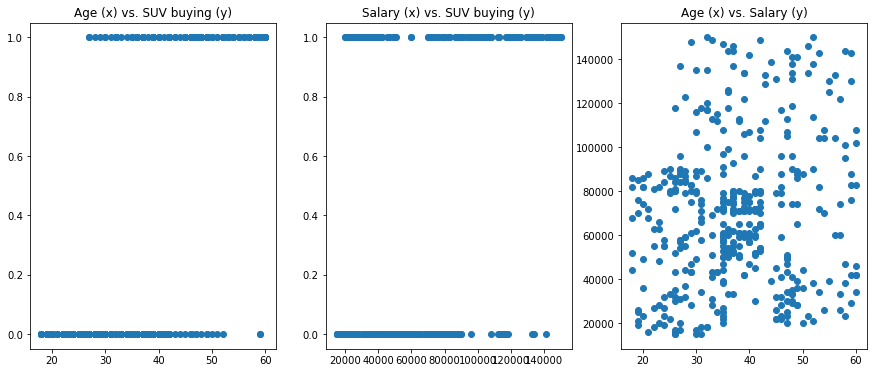

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,6))
ax1.scatter(X[:,0], y)
ax1.set_title("Age (x) vs. SUV buying (y)")
ax2.scatter(X[:,1], y)
ax2.set_title("Salary (x) vs. SUV buying (y)")
ax3.scatter(X[:,0],X[:,1])
ax3.set_title("Age (x) vs. Salary (y)")
plt.tight_layout
plt.show()

## Random_Forrest
**Preprocessing**: No preprocessing is applied. The dataset is split into 75% training and 25% test.

**Approach**: Random Forrest involves create multiple decision trees, and selecting the most common predictions from each tree. It is called 'random' because each tree is built around a sample of data with replacement, and at each node a limited number of features are randomly selected as potential splits. The general principle is to build a large number of small trees, which are likely over-fitted, but given the trees are built on different data, the errors are relatively independent and therefore will cancel out. This is referred to as an *ensemble* method.

**Advantages/Disadvantages**: The advantages are the same as a decision tree (highly flexible model, limited preprocessing, very little assumptions), however we have reduced variance, reduced noise, and reduced the chance of over-fitting (whilst keeping bias the same). The disadvantages are that random forrests can still overfit data, the model becomes less interpretable, and it can be computationally intensive.

**Results**: THe accuracy of the model is 93%.

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

pipeline = Pipeline([('clf', RandomForestClassifier(criterion='entropy', max_depth=5))])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)
accuracy_score(y_test,predictions)


[[64  4]
 [ 3 29]]


0.93

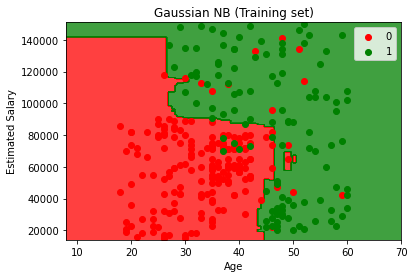

In [17]:
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forrest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

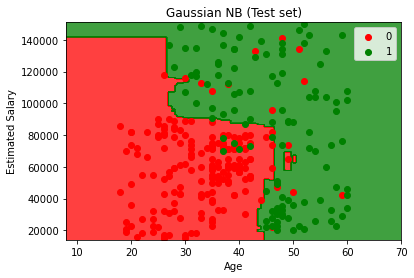

In [18]:
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forrest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()